# [ML] Linear Regression
### Linear Regression with Confusion Matrix, ROC curve, AUC.
#### -- Duc Tai Dinh - AI23, HCMUS, VNUHCM --

In [1]:
# 1: Import libs
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

%matplotlib inline
sns.set(style='whitegrid')

In [2]:
# 2: Prepare data
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_redundant=0, n_clusters_per_class=1, random_state=18)

print("Sample data size:", X.shape[0])
print("Labels:", np.unique(y))

Sample data size: 1000
Labels: [0 1]


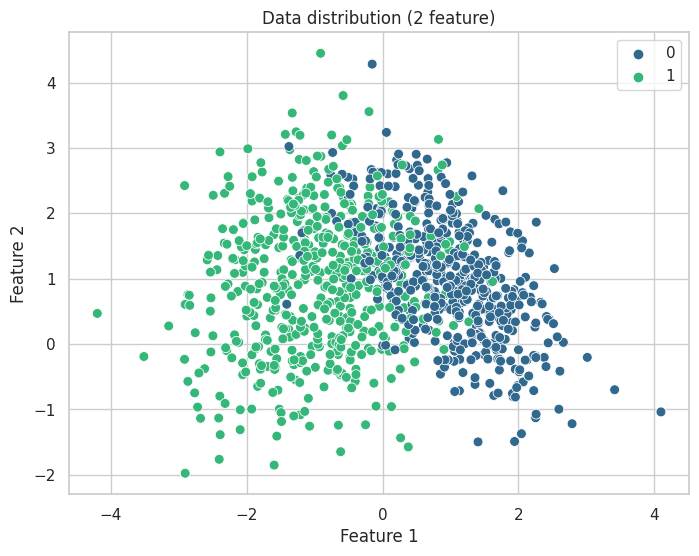

In [3]:
# 3: Visualize data
plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, palette="viridis", s=50)
plt.title("Data distribution (2 feature)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [4]:
# 4: Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create and Train model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # xác suất dự đoán cho lớp 1

print("Model's coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Model's coefficient: [[-2.67435134 -0.5791316 ]]
Intercept: [0.87469574]


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       150
           1       0.88      0.89      0.89       150

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



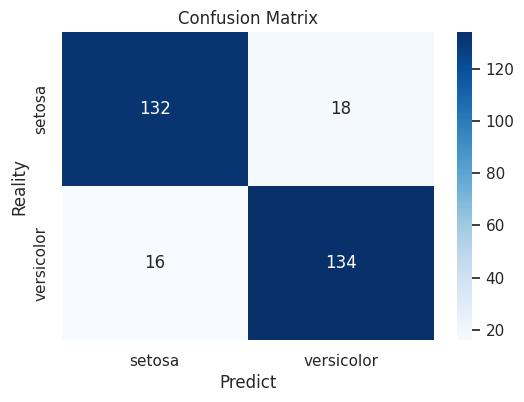

In [5]:
# 5: Evaluate model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['setosa','versicolor'], yticklabels=['setosa','versicolor'])
plt.title("Confusion Matrix")
plt.xlabel("Predict")
plt.ylabel("Reality")
plt.show()

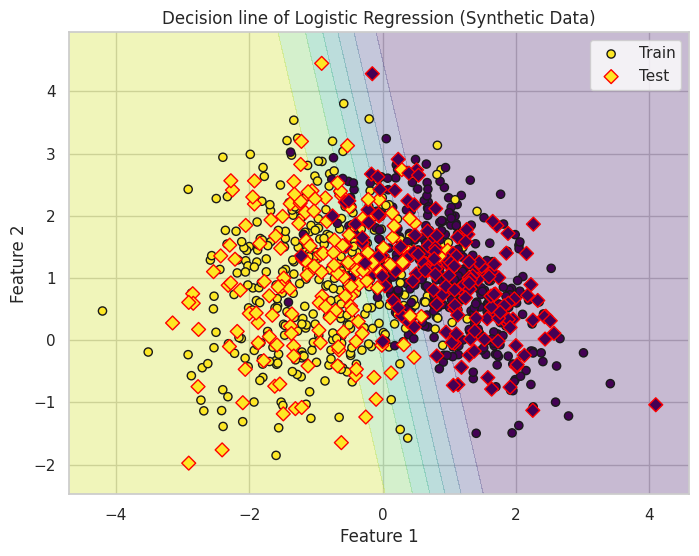

In [6]:
# Visualize decision line
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict all points on grid
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, probs, alpha=0.3, cmap="viridis")
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=35, cmap="viridis", edgecolor="k", label="Train")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=50, cmap="viridis", marker="D", edgecolor="red", label="Test")
plt.title("Decision line of Logistic Regression (Synthetic Data)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


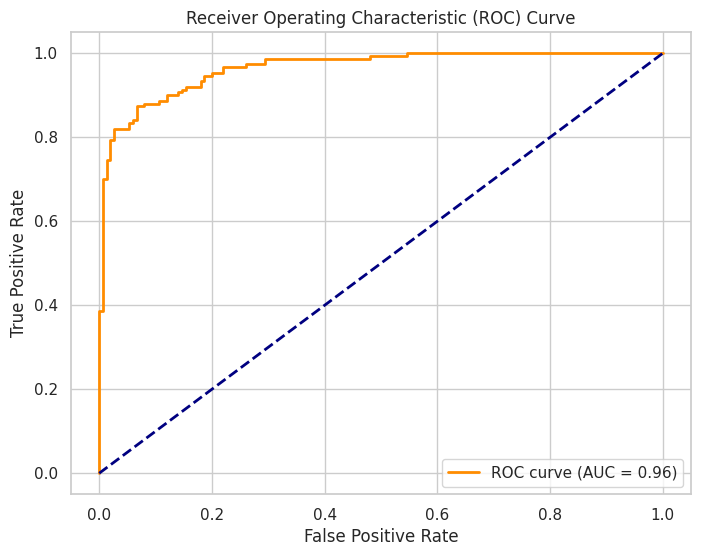

In [7]:
# 7: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
